In [1]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt


In [6]:
options = {'model': 'cfg/yolo.cfg',
           'load' : 'bin/yolov2.weights',
           'threshold' : 0.3,
          }

tfnet = TFNet(options)

Parsing ./cfg/yolov2.cfg
Parsing cfg/yolo.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.03116011619567871s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  

In [8]:
img = cv2.imread('/home/calsoft/Desktop/dx.jpeg')
result = tfnet.return_predict(img)
result

[{'label': 'dog',
  'confidence': 0.5175885,
  'topleft': {'x': 16, 'y': 8},
  'bottomright': {'x': 185, 'y': 171}},
 {'label': 'tie',
  'confidence': 0.4583664,
  'topleft': {'x': 80, 'y': 110},
  'bottomright': {'x': 160, 'y': 189}}]

(16, 8) dog
(80, 110) tie


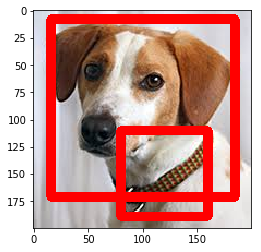

In [25]:
for i in range(len(result)):
    t = (result[i]['topleft']['x'],result[i]['topleft']['y'])
    b = (result[i]['bottomright']['x'],result[i]['bottomright']['y'])
    l = (result[i]['label'])
    img = cv2.rectangle(img,t,b,(0,0,255),7)
    print(t ,l)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()